# Examine discordant plots with mashr

In [1]:
library(dplyr)
library(mashr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ashr



In [2]:
load("../../_m/genes/mashr_meta_results.RData")
labs = c("Caudate", "DLPFC", "Hippocampus")

## Load SZ associated eGenes

In [3]:
df <- data.table::fread("../../summary_table/_m/Brainseq_LIBD_caudate_specific_4features_PGC2.eGenes.txt.gz") %>% 
    select(variant_id, gene_id, P, Type) %>% filter(Type=="Gene") %>%
    arrange(P) %>% mutate(effect=paste(gene_id, variant_id, sep="_"))
df

variant_id,gene_id,P,Type,effect
<chr>,<chr>,<dbl>,<chr>,<chr>
chr6:31910718:A:G,ENSG00000204371.11,5.34e-15,Gene,ENSG00000204371.11_chr6:31910718:A:G
chr6:26090224:T:C,ENSG00000124610.4,1.50e-13,Gene,ENSG00000124610.4_chr6:26090224:T:C
chr14:103800327:C:T,ENSG00000088808.16,1.24e-12,Gene,ENSG00000088808.16_chr14:103800327:C:T
chr16:29971163:G:A,ENSG00000149930.17,2.23e-12,Gene,ENSG00000149930.17_chr16:29971163:G:A
chr16:29961369:C:T,ENSG00000174938.14,3.06e-12,Gene,ENSG00000174938.14_chr16:29961369:C:T
chr2:200299060:A:G,ENSG00000196141.13,8.28e-11,Gene,ENSG00000196141.13_chr2:200299060:A:G
chr3:181110020:A:G,ENSG00000205981.6,4.30e-10,Gene,ENSG00000205981.6_chr3:181110020:A:G
chr22:42070946:C:T,ENSG00000213790.2,2.62e-09,Gene,ENSG00000213790.2_chr22:42070946:C:T
chr5:152894716:G:A,ENSG00000249484.8,5.71e-09,Gene,ENSG00000249484.8_chr5:152894716:G:A


In [4]:
m2$result$PosteriorMean %>% as.data.frame %>%
    tibble::rownames_to_column("effect") %>%
    filter(effect %in% df$effect) %>% arrange(Caudate)

effect,Caudate,DLPFC,Hippocampus
<chr>,<dbl>,<dbl>,<dbl>
ENSG00000196141.13_chr2:200299060:A:G,-0.18460545,-0.0243577334,-0.042776874
ENSG00000150967.17_chr12:122966218:G:C,-0.10385129,0.0027315007,0.014531011
ENSG00000205981.6_chr3:181110020:A:G,-0.06915457,-0.0402940544,-0.031043260
ENSG00000174938.14_chr16:29961369:C:T,0.11417056,0.0446638014,0.004810389
ENSG00000213790.2_chr22:42070946:C:T,0.13182114,-0.0455366398,0.026797887
ENSG00000204386.10_chr6:31701719:C:T,0.16037133,-0.0034306019,-0.024876851
ENSG00000149930.17_chr16:29971163:G:A,0.16881147,-0.0012440206,-0.027868874
ENSG00000124610.4_chr6:26090224:T:C,0.18508321,0.0257459230,0.048399175
ENSG00000088808.16_chr14:103800327:C:T,0.33169961,0.0119323438,-0.024170940


## Generate metaplots

### Interaction model

     Caudate        DLPFC  Hippocampus 
 0.429980038 -0.023254863 -0.008380841 
    Caudate       DLPFC Hippocampus 
 0.18508321  0.02574592  0.04839918 


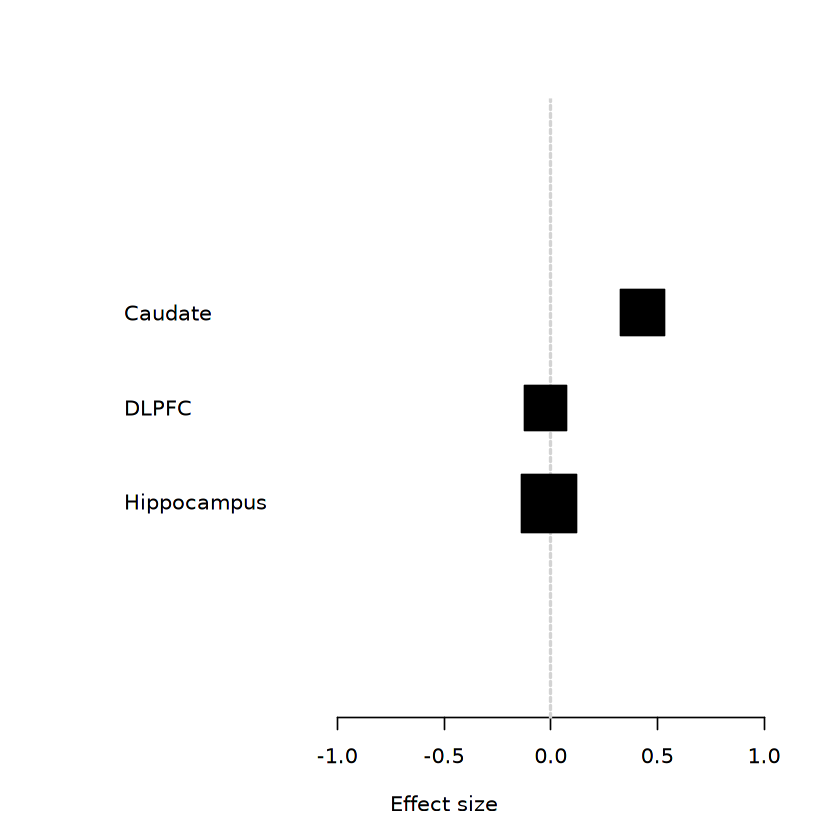

    Caudate       DLPFC Hippocampus 
 0.33169961  0.01193234 -0.02417094 


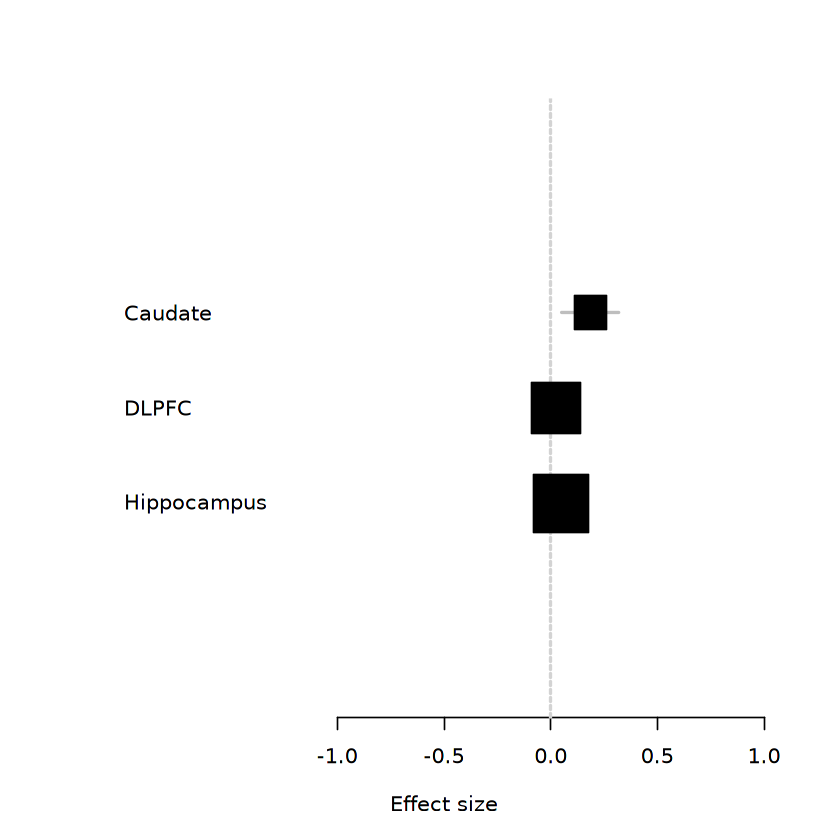

     Caudate        DLPFC  Hippocampus 
 0.168811472 -0.001244021 -0.027868874 


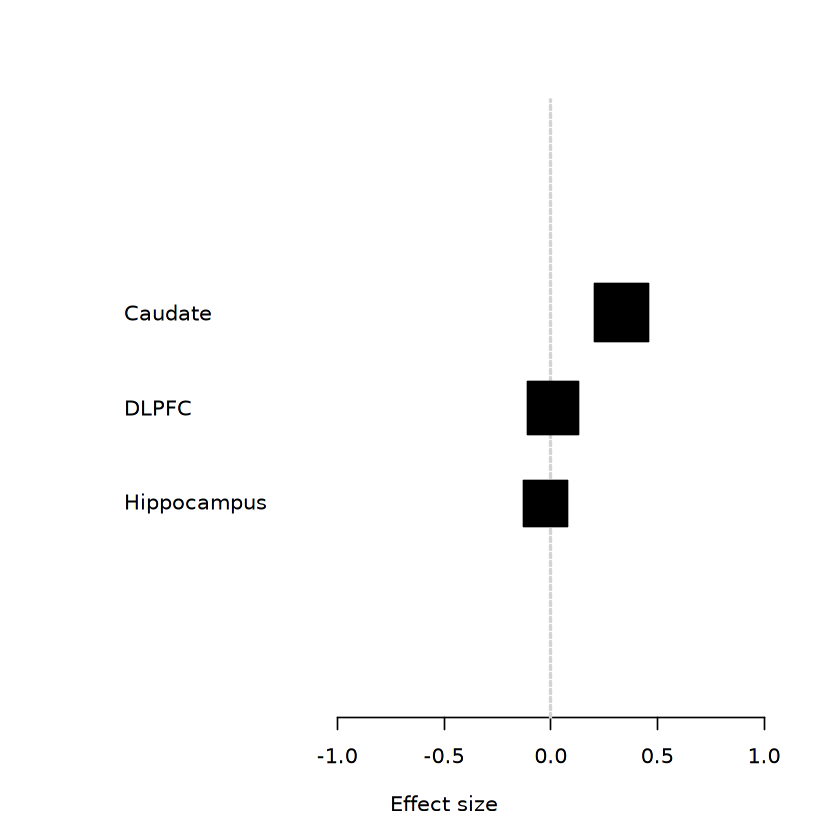

    Caudate       DLPFC Hippocampus 
0.114170558 0.044663801 0.004810389 


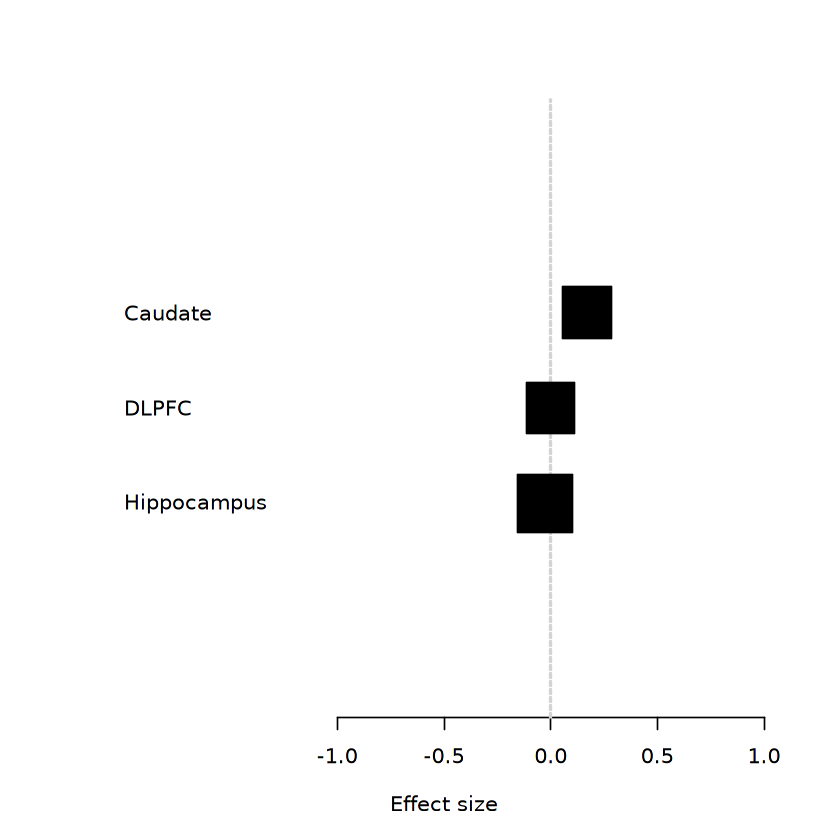

    Caudate       DLPFC Hippocampus 
-0.18460545 -0.02435773 -0.04277687 


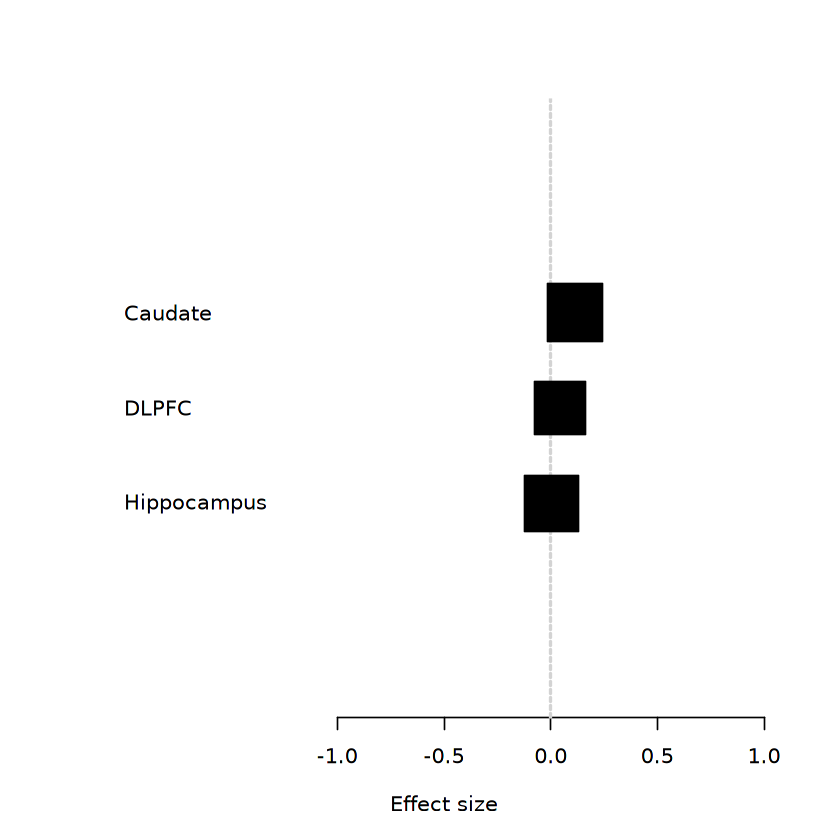

    Caudate       DLPFC Hippocampus 
-0.06915457 -0.04029405 -0.03104326 


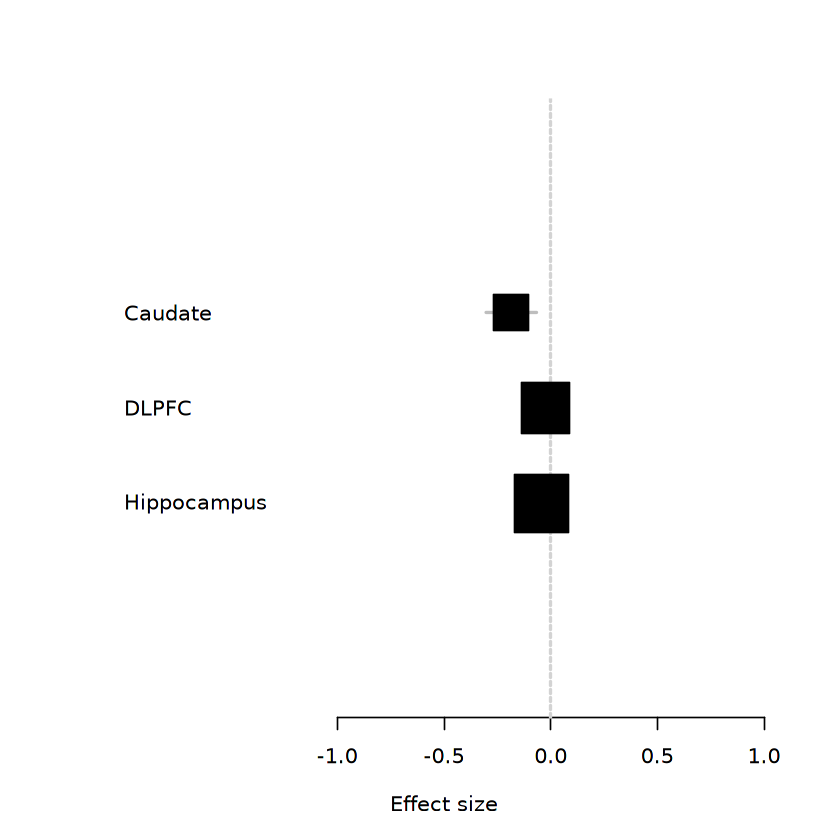

    Caudate       DLPFC Hippocampus 
 0.13182114 -0.04553664  0.02679789 


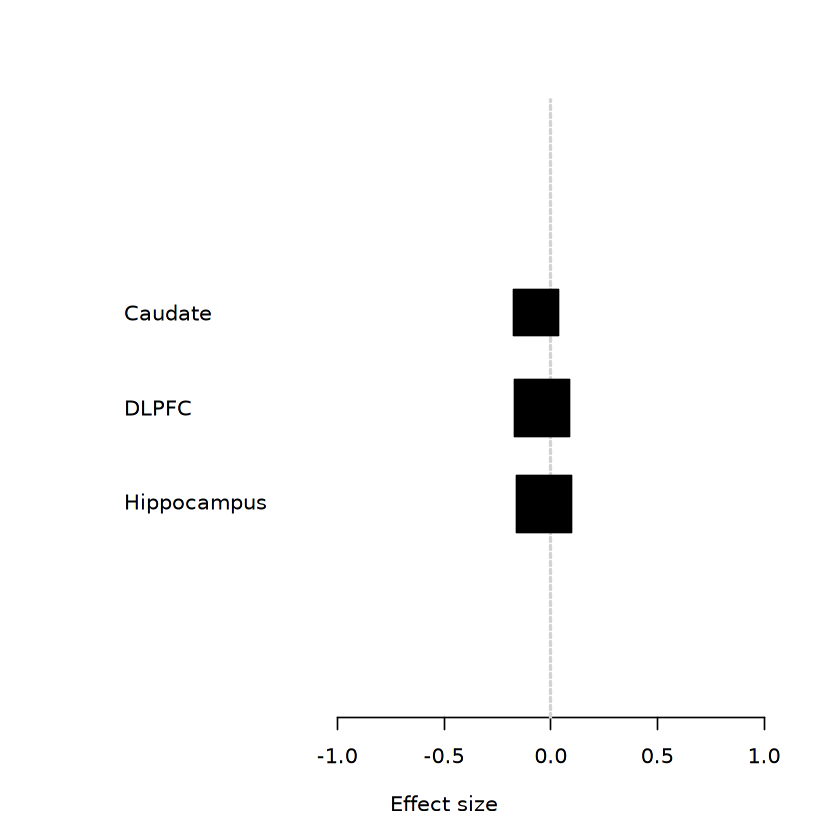

     Caudate        DLPFC  Hippocampus 
0.3975912784 0.0006505036 0.0684216599 


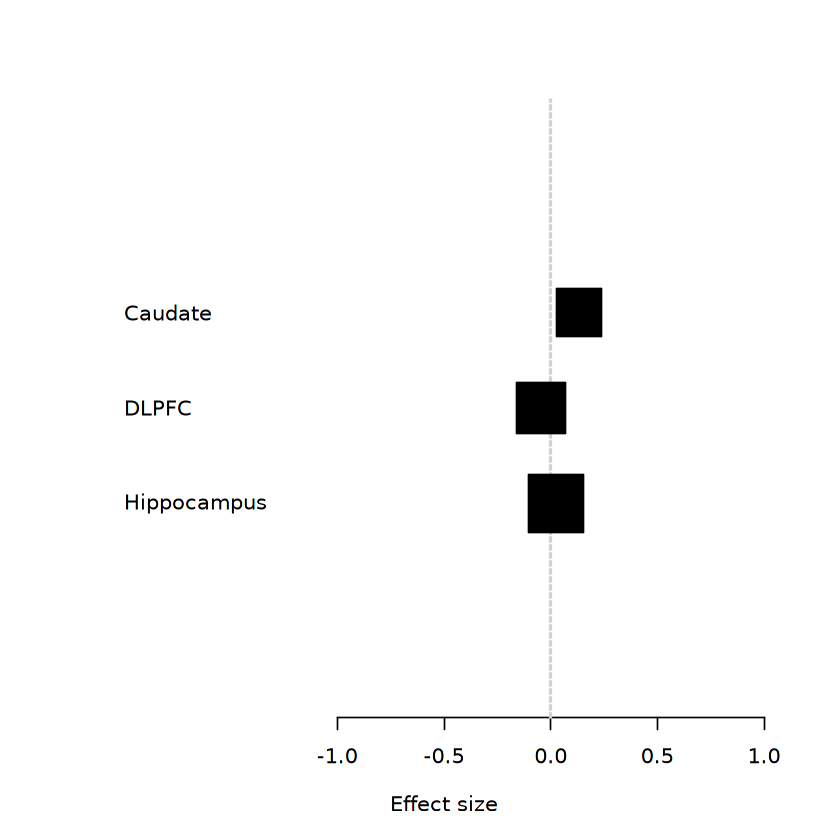

     Caudate        DLPFC  Hippocampus 
-0.103851287  0.002731501  0.014531011 


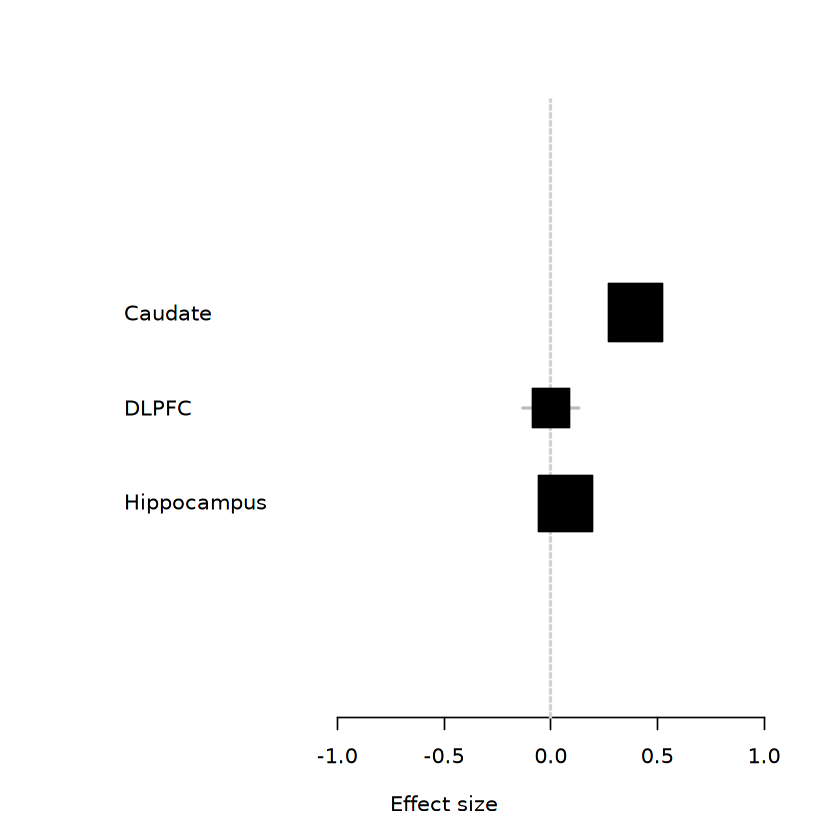

     Caudate        DLPFC  Hippocampus 
 0.160371331 -0.003430602 -0.024876851 


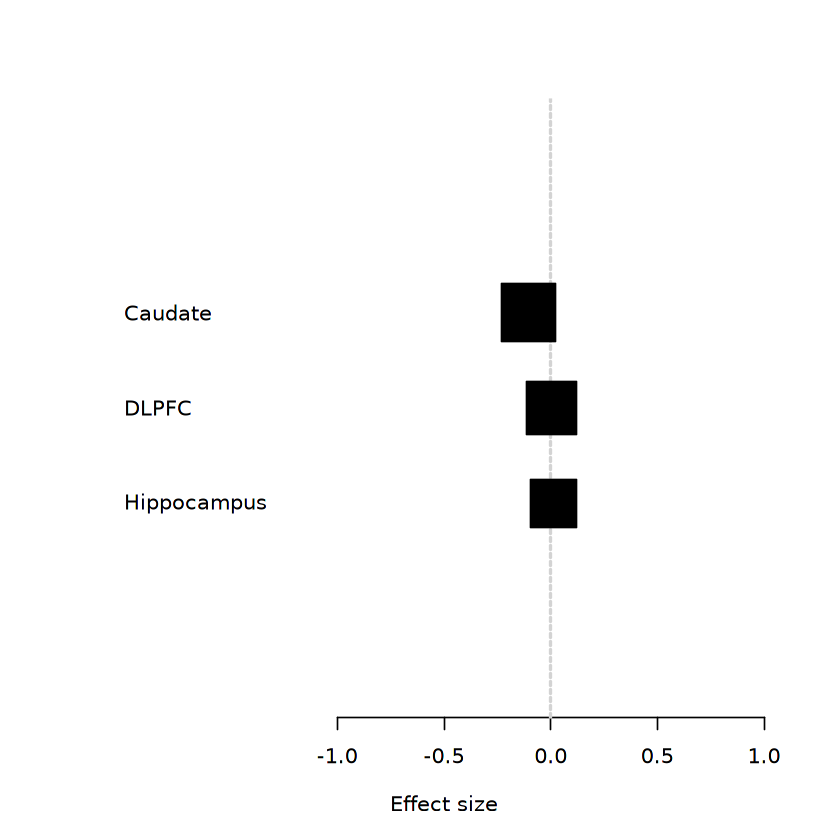

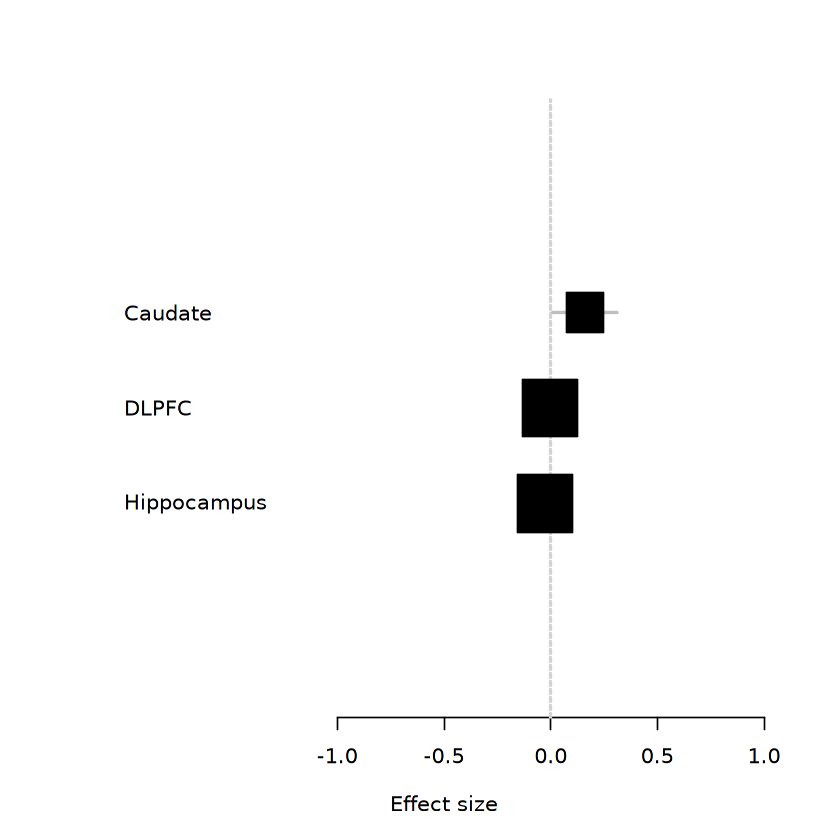

In [5]:
for(ii in seq_along(df$effect)){
    gene_id = df$effect[ii]
    outfile = paste("metaplot", df$gene_id[ii], sep="_")
    print(m2$result$PosteriorMean[gene_id,])
    mash_plot_meta(m2, get_significant_results(m2)[gene_id], ylab="", xlim=c(-1, 1), labels=labs)
    R.devices::devEval(c("png", "pdf"), name=outfile, {
        mash_plot_meta(m2, get_significant_results(m2)[gene_id], ylab="", xlim=c(-1, 1), labels=labs)
    })
}

## Reproducibility

In [6]:
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()

[1] "2021-08-31 17:14:12 EDT"

   user  system elapsed 
  6.839   0.571   7.714 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-08-31                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source                            
 abind         1.4-5    2016-07-21 [1] CRAN (R 4.0.2)                    
 ashr        * 2.2-51   2021-07-22 [1] Github (stephens999/ashr@23ba36a) 
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)                    
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)                    
 